In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/BubbleGrowth_vs_Time.xlsx - Final_Data (1).csv')
df=df.dropna()
df= df[df['fluid'].str.contains('water', case=False, na=False)]


In [ ]:
x=df.drop(['d/dMax'],axis=1)
y=df['d/dMax']

In [ ]:
# y_train=df_train['d/dMax']
# y_test=df_test['d/dMax']
df=df.drop(['fluid','flow/pool'],axis=1)

In [ ]:
df

,pressure(bar),heat flux(kW/m2),mass fluxkg/(m2⋅s),sub cooling,channel dia(mm),d/dMax,t/tMax
0,1.110,173.0,495.0,6.5,13.33,0.154977,0.004673
1,1.110,173.0,495.0,6.5,13.33,0.215351,0.009346
2,1.110,173.0,495.0,6.5,13.33,0.260160,0.014019
3,1.110,173.0,495.0,6.5,13.33,0.296914,0.018692
4,1.110,173.0,495.0,6.5,13.33,0.328518,0.023364
...,...,...,...,...,...,...,...
16252,1.013,17.9,204.0,43.8,25.00,0.750000,0.214211
16253,1.013,17.9,204.0,43.8,25.00,0.875000,0.219079
16254,1.013,17.9,204.0,43.8,25.00,0.750000,0.223947
16255,1.013,17.9,204.0,43.8,25.00,0.875000,0.287237


In [ ]:
# x_train=df_train.drop(['d/dMax'],axis=1)
# x_test=df_test.drop(['d/dMax'],axis=1)

In [ ]:
# prompt: write code for lstm for above data

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input
# Reshape the data for LSTM input
x_train = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=300))

model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

# Make predictions
y_pred = model.predict(x_test)


Epoch 1/5
407/407 [==============================] - 14s 28ms/step - loss: 0.0627
Epoch 2/5
407/407 [==============================] - 12s 29ms/step - loss: 0.0357
Epoch 3/5
407/407 [==============================] - 12s 30ms/step - loss: 0.0288
Epoch 4/5
407/407 [==============================] - 12s 29ms/step - loss: 0.0232
Epoch 5/5
102/102 [==============================] - 2s 12ms/step - loss: 0.0193
Test loss: 0.01926666870713234
102/102 [==============================] - 2s 9ms/step


In [ ]:
# prompt: print r2

from sklearn.metrics import r2_score

y_true = y_test.values.reshape(-1, 1)
r2 = r2_score(y_true, y_pred)
print(f'R^2: {r2}')


R^2: 0.7034138459713668


Epoch 1/20
1083/1083 [==============================] - 23s 21ms/step - loss: 0.0162 - val_loss: 0.0167
Epoch 2/20
1083/1083 [==============================] - 24s 22ms/step - loss: 0.0146 - val_loss: 0.0127
Epoch 3/20
1083/1083 [==============================] - 24s 22ms/step - loss: 0.0137 - val_loss: 0.0136
Epoch 4/20
1083/1083 [==============================] - 25s 23ms/step - loss: 0.0133 - val_loss: 0.0123
Epoch 5/20
1083/1083 [==============================] - 23s 22ms/step - loss: 0.0126 - val_loss: 0.0116
Epoch 6/20
1083/1083 [==============================] - 24s 22ms/step - loss: 0.0122 - val_loss: 0.0109
Epoch 7/20
1083/1083 [==============================] - 24s 22ms/step - loss: 0.0118 - val_loss: 0.0099
Epoch 8/20
1083/1083 [==============================] - 23s 22ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 9/20
1083/1083 [==============================] - 23s 22ms/step - loss: 0.0116 - val_loss: 0.0118
Epoch 10/20
1083/1083 [==============================] - 24s 22m

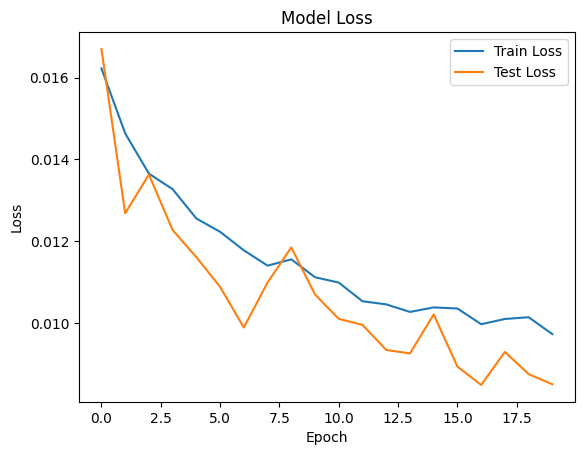

In [ ]:
import matplotlib.pyplot as plt

# Train the model and save the history
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_test, y_test))

# Get loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


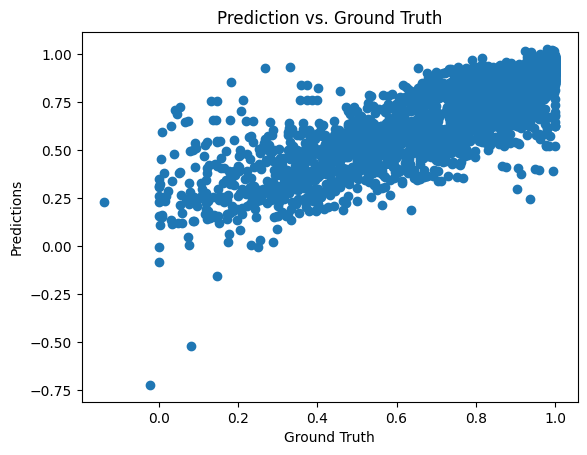

In [ ]:
import matplotlib.pyplot as plt

# Plot Prediction vs. Ground Truth
plt.scatter(y_test, y_pred)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Prediction vs. Ground Truth')
plt.show()
